# **Linear Regression**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia



## Synthetic Data Preparation

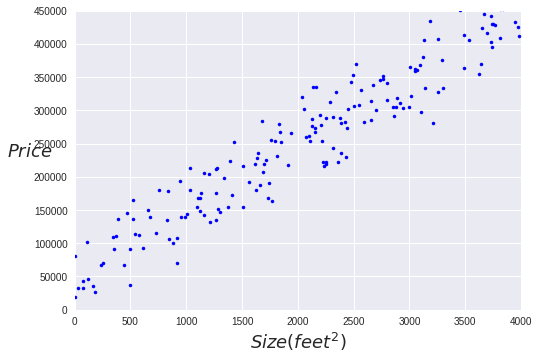

In [47]:
import numpy as np                   # this is our old friend, the handy NumPy
import matplotlib.pyplot as plt      # matplotlib takes cares of ploting   

from sklearn.model_selection import train_test_split   # we use this module to split the dataset to two parts, the training data, 
                                                       #which we use to train the learner, and the test data, which we use to evaluate 
                                                       # the performance of the trained model when it is given unseen data,
                                                       #to assess its generalization power. 
     
data_size = 300   
# we create a synthetic data set      
x = 4000 * np.random.rand(data_size, 1)
y = 50000 + 100 * x +35000*np.random.randn(data_size, 1)



#we split the dataset to training and testing
test_fraction=0.4

x_train, x_test, y_train, y_test=train_test_split (x, y, test_size=test_fraction, random_state=6)


training_size=data_size*(1-test_fraction)
test_size=data_size*test_fraction

plt.plot(x_train, y_train, "b.")


plt.xlabel("$Size (feet^2)$", fontsize=18)
plt.ylabel("$Price$", rotation=0, fontsize=18)
plt.axis([0, 4000, 0, 450000])
plt.show()


## Different Hypotheses

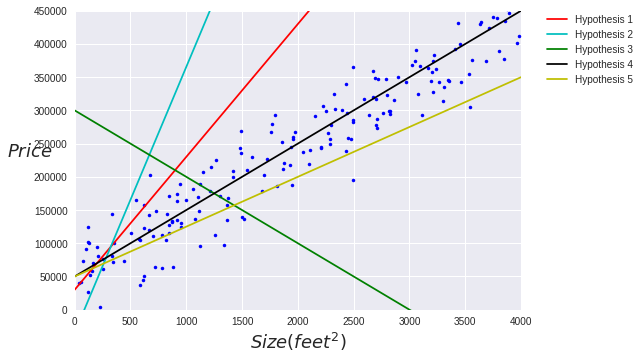

In [31]:
import matplotlib.patches as mpatches

#here we are just ploting the training data
plt.plot(x_train, y_train, "b.")
plt.xlabel("$Size (feet^2)$", fontsize=18)
plt.ylabel("$Price$", rotation=0, fontsize=18)
plt.axis([0, 4000, 0, 450000])




x_hat=np.linspace(0,4000,100)



x_p=np.c_[np.ones((100)),x_hat] # we are adding x_0=1 as the first feature
x_p=x_p.T


#Hypothesis 1

w1=np.array([30000,200])
y_hat=w1.dot(x_p) 
plt.plot(x_hat,y_hat,"r",label="Hypothesis 1")



#Hypothesis 2
w2=np.array([-34567,400])
y_hat=w2.dot(x_p)
plt.plot(x_hat,y_hat,"c",label="Hypothesis 2")





#Hypothesis 3
w3=np.array([300000,-100])
y_hat=w3.dot(x_p)
plt.plot(x_hat,y_hat,"g",label="Hypothesis 3")



#Hypothesis 4
w4=np.array([50000,100])
y_hat=w4.dot(x_p)
plt.plot(x_hat,y_hat,"k",label="Hypothesis 4")


#Hypothesis 5
w5=np.array([50000,75])
y_hat=w5.dot(x_p)
plt.plot(x_hat,y_hat,"y",label="Hypothesis 5")




plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


## Analytically Calculating the Optimal W

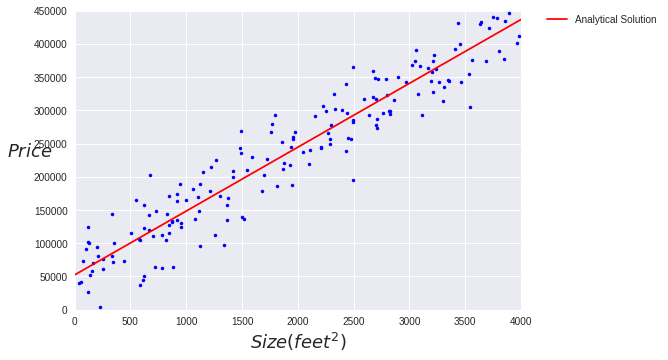

Mean Squared Error of Analytical Solution on the Training Data is  10584717.882535726


In [32]:
from sklearn.metrics import mean_squared_error

x_trainp=np.c_[np.ones((int(training_size))),x_train]  #padding x_train with dummy ones

w_optimal = np.linalg.inv(x_trainp.T.dot(x_trainp)).dot(x_trainp.T).dot(y_train)  #Analyticaly calculating the optimal W.
w_optimal =w_optimal.reshape(2,) 



plt.plot(x_train, y_train, "b.")
plt.xlabel("$Size (feet^2)$", fontsize=18)
plt.ylabel("$Price$", rotation=0, fontsize=18)
plt.axis([0, 4000, 0, 450000])



x_hat=np.linspace(0,4000,100)
x_p=np.c_[np.ones((100)),x_hat] # we are adding x_0=1 as the first feature
x_p=x_p.T


#Optimal Linear Regression Model Obtained through Normal Equation
w5=np.array([50000,75])


y_hat=w_optimal.dot(x_p) 
plt.plot(x_hat,y_hat,"r",label="Analytical Solution")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


x_trainp=x_trainp.T
y_hat=w_optimal.dot(x_trainp) 


print("Mean Squared Error of Analytical Solution on the Training Data is ",1/(test_size)*mean_squared_error(y_hat,y_train))

## Testing

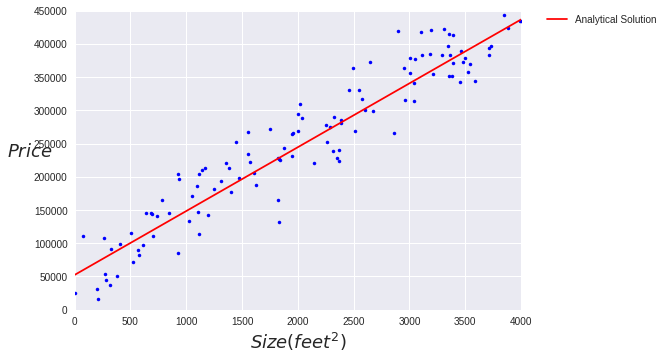

Mean Squared Error of Analytical Solution on the Test Data is  10793516.254426455


In [33]:
from sklearn.metrics import mean_squared_error


x_testp=np.c_[np.ones((int(test_size))),x_test]
 

plt.plot(x_test, y_test, "b.")
plt.xlabel("$Size (feet^2)$", fontsize=18)
plt.ylabel("$Price$", rotation=0, fontsize=18)
plt.axis([0, 4000, 0, 450000])



x_hat=np.linspace(0,4000,100)
x_p=np.c_[np.ones((100)),x_hat] # we are adding x_0=1 as the first feature
x_p=x_p.T


#Optimal Linear Regression Model Obtained through Normal Equation
w5=np.array([50000,75])


y_hat=w_optimal.dot(x_p) 
plt.plot(x_hat,y_hat,"r",label="Analytical Solution")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


x_testp=x_testp.T
y_hat=w_optimal.dot(x_testp) 


print("Mean Squared Error of Analytical Solution on the Test Data is ",1/(test_size)*mean_squared_error(y_hat,y_test))

## Linear Regression Directly Implmented by Scikit-Learn

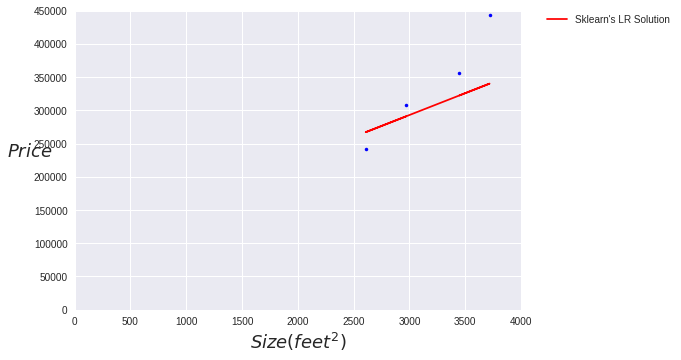

Mean Squared Error of Sklearn's LR Solution on the Test Data is  799917618.6271999


In [46]:
from sklearn.linear_model import LinearRegression  # we import LinearRegression from sklearn module

linreg = LinearRegression()



linreg.fit(x_train, y_train)                       # this is where we fit a model to data using linreg


linreg.intercept_, linreg.coef_                    #we are printing out the results





# ploting the results

plt.plot(x_test, y_test, "b.")
plt.xlabel("$Size (feet^2)$", fontsize=18)
plt.ylabel("$Price$", rotation=0, fontsize=18)
plt.axis([0, 4000, 0, 450000])





y_hat=linreg.predict(x_test)

plt.plot(x_test,y_hat,"r",label="Sklearn's LR Solution")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print("Mean Squared Error of Sklearn's LR Solution on the Test Data is ",1/(test_size)*mean_squared_error(y_hat,y_test))

## Linear Regression with Gradient Descent

In [18]:
#This code is not complete yet! Will update it and will share it with you! - Behnam Kia
import random
random.seed(1)

from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
scalery = preprocessing.StandardScaler().fit(y_train)
y_train=scalery.transform(y_train)

x_trainp=np.c_[np.ones((int(training_size))),x_train]  #padding x_train with ones



alpha = 0.1
n_iterations = 100
m = training_size
W = np.array([0.5,0.5])

for iteration in range(n_iterations):
    gradients = 2/m * x_trainp.T.dot(x_trainp.dot(theta) - y_train)
    W = W - alpha * gradients
    
x_hat=np.linspace(-2,2,100)
x_p=np.c_[np.ones((100)),x_hat] # we are adding x_0=1 as the first feature
x_p=x_p.T


y_hat=W.T.dot(x_p) 


plt.plot(x_hat,y_hat.T,"r",label="Optimal W obtained by GS")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.plot(x_train_scaled,y_train_scaled,"b.")



plt.show()


NameError: ignored

In [0]:
from sklearn import linear_model
linear_model.SGDRegressor()